In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv("C:\\Users\\sarit\\Desktop\\Today\\IRIS.csv")

In [7]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
data.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

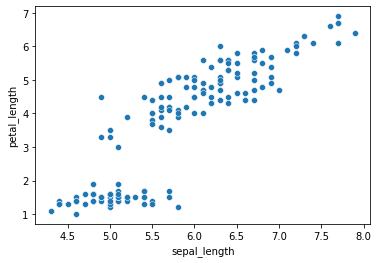

In [11]:
sns.scatterplot(x=data.sepal_length,y=data.petal_length)

<AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>

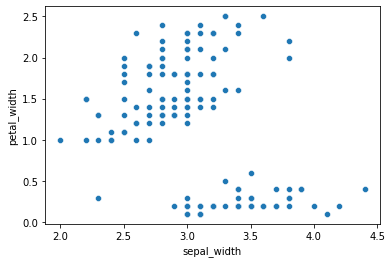

In [12]:
sns.scatterplot(x=data.sepal_width,y=data.petal_width)

In [13]:
import sklearn

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x=data.drop(["species"],axis=1)
y=data.species

In [16]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [19]:
from sklearn.svm import SVC

In [20]:
sc=SVC()
    #C=1.0,
    #kernel='rbf',
    #gamma='scale',

In [21]:
sc.fit(x_train,y_train)

SVC()

In [22]:
pred=sc.predict(x_test)

In [23]:
pred[0:5]

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [24]:
y_test[0:5]

15        Iris-setosa
101    Iris-virginica
110    Iris-virginica
11        Iris-setosa
27        Iris-setosa
Name: species, dtype: object

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [26]:
print(classification_report(pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.73      0.84        11
 Iris-virginica       0.75      1.00      0.86         9

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.90        30
   weighted avg       0.93      0.90      0.90        30



In [27]:
print(confusion_matrix(pred,y_test))

[[10  0  0]
 [ 0  8  3]
 [ 0  0  9]]


In [28]:
sc.predict([[4.3,.5,2.1,.1]])

C:\Users\SIDDHARTH\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)

In [29]:
parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
              'C':[1, 5, 10, 20,0.01]
}

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [31]:
# grid search
classifier = GridSearchCV(sc, parameters, cv=5)

In [32]:
# fitting the data to our model
classifier.fit(x,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20, 0.01],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [33]:
classifier.cv_results_

{'mean_fit_time': array([0.00919304, 0.00639682, 0.0063972 , 0.00719504, 0.00559535,
        0.00480027, 0.00479703, 0.00679426, 0.00419683, 0.00759482,
        0.00379462, 0.00819473, 0.0037982 , 0.00619788, 0.00539484,
        0.00799828, 0.00599794, 0.00519619, 0.01039491, 0.00959206]),
 'std_fit_time': array([0.00370818, 0.00195915, 0.00286965, 0.00159904, 0.00102008,
        0.00147137, 0.00171851, 0.00222519, 0.0009789 , 0.00224352,
        0.00160292, 0.00299228, 0.00172191, 0.00248366, 0.00102161,
        0.00302859, 0.00228146, 0.00159864, 0.0037173 , 0.00556704]),
 'mean_score_time': array([0.00719476, 0.00399842, 0.00439553, 0.004597  , 0.00419669,
        0.00299621, 0.00339847, 0.00420175, 0.00319896, 0.00400009,
        0.00259976, 0.00639567, 0.00259733, 0.00280156, 0.00319939,
        0.00439658, 0.00579414, 0.00379844, 0.00499606, 0.00459905]),
 'std_score_time': array([0.004442  , 0.00126192, 0.00135496, 0.00422148, 0.00299207,
        0.00089144, 0.00120086, 0.001941

In [34]:
# best parameters

best_parameters = classifier.best_params_
print(best_parameters)

{'C': 5, 'kernel': 'rbf'}


In [35]:

highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9866666666666667
